# Исследование надежности заемщиков.

**Описание проекта**

Заказчик - кредитный отдел банка.  
Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.  
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования**

Установить:
- Есть ли зависимость между количеством детей и возвратом кредита в срок;
- Есть ли зависимость между семейным положением и возвратом кредита в срок;
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок;
- Как разные цели кредита влияют на его возврат в срок?

**Данные**

`/datasets/data.csv`

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

### Шаг 1. Обзор данных

In [1]:
# импортирую библиотеки
import pandas as pd

In [2]:
# читаю данные
data = pd.read_csv('/datasets/data.csv')

In [3]:
# ознакамливаюсь с данными: получаю общую сводку, проверяю имена колонок на пробелы, читаю первые десять строк
data.info()
print(data.columns)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Предварительный обзор**

В датасете 21525 строк. Названия колонок соответствуют документации.  
4 столбца с численными данными: `children`, `days_employed`, `dob_years`, `total_income`  
8 столбцов с категориальными данными: `education`, `education_id`, `family_status`, `family_status_id`, `gender`, `income_type`, `debt`, `purpose`

**Предварительные замечания:**

- Имеется одинаковое количество пропусков в столбцах `days_employed` и `total_income`;
- `days_employed` должно быть представленно целочисленными данными. Для исследования `total_income` тоже можно перевести в целочисленный тип.
- Аномально большое значение по индексу 4 в столбце `days_employed`, остальные видимые значения отрицательны.
- В столбцах `education`, `family_status`, `purpose` - отсутствует единый формат заполнения - неявные дубликаты;
- Столбцы `education` и `education_id`, `family status` и `family_status_id` - в отношении ценности данных для исследования - дублируют друг друга.

### Шаг 2.1 Заполнение пропусков

Установим долю пропусков от общего количества строк. Проверим на взаимосвязь между пропусками в столбцах `days_employed` и `total_income`.

In [15]:
# нахожу количество и процент от общего количества, использую print вместо display для компактного вывода
print('Количество строк с пропусками:', data['days_employed'].isna().sum())

# для процентовки использую f-строку
# - старая версия - print(f"Это {data['days_employed'].isna().sum() / data['days_employed'].count() :.2%} от общего количества")
# -исправил старую версию - print(f"Это {data['days_employed'].isna().sum() / len(data) :.2%} от общего количества")
print(f"Это {data['days_employed'].isna().mean() :.2%} от общего количества")

# подсчитываю количество строк с пропусками в обоих столбцах
print(
    'Из них с пропусками в столбцах days_employed и total_income:', 
    data.loc[(data['days_employed'].isna()) &
    (data['total_income'].isna())].shape[0]
)

Количество строк с пропусками: 2174
0.10099883855981417
Это 10.10% от общего количества
Из них с пропусками в столбцах days_employed и total_income: 2174


Выведем пять первых и пять последних строк с пропусками, на случай иных явных связей.

In [16]:
# фильтр по методу .isna()
display(data[data['days_employed'].isna()].head())
data[data['days_employed'].isna()].tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля


Иных явных связей нет.  

Связь между пропусками в столбцах `days_employed` и `total_income` подтверждена. Также в столбце `days_employed` замечены аномально большие, и отрицательные значения. Явная проблема с выгрузкой данных и/или исходными данными. Эту информацию необходимо передать разработчикам для дальнейшего установления причин и устранения проблем.  
Данные столбца `days_employed` не требуются для выполнения цели исследования и не повлияют на результат. 

Процент строк с пропусками существенный, более 10% от всего датасета. Заполним пропуски медианными значениями, как методом наиболее стойким к аномалиям.  

In [17]:
# вывожу медианные значения days_employed и total_income для каждой категории, для проверки после замещений
data.groupby('income_type')['days_employed', 'total_income'].median()

,days_employed,total_income
income_type,,
безработный,366413.652744,131339.751676
в декрете,-3296.759962,53829.130729
госслужащий,-2689.368353,150447.935283
компаньон,-1547.382223,172357.950966
пенсионер,365213.306266,118514.486412
предприниматель,-520.848083,499163.144947
сотрудник,-1574.202821,142594.396847
студент,-578.751554,98201.625314


In [22]:
# fillna чтобы заменить только NaN. Аргумент - датафрейм сгруппированный по 'income_type', применяю mean через transform на все занчения датафрейма
data = data.fillna(data.groupby('income_type').transform('median'))

# вывожу медианные значения days_employed и total_income для сравнения
display(data.groupby('income_type')['days_employed', 'total_income'].median())

# проверяю количество строк с пропусками
print('Количество строк с пропусками:', data['days_employed'].isna().sum())

,days_employed,total_income
income_type,,
безработный,366413.652744,131339.751676
в декрете,-3296.759962,53829.130729
госслужащий,-3040.268136,161331.258781
компаньон,-1769.534329,186258.299315
пенсионер,365003.491245,128747.675570
предприниматель,-520.848083,499163.144947
сотрудник,-1811.811959,151820.150745
студент,-578.751554,98201.625314


Количество строк с пропусками: 0


Все пропуски заполнены медианными значениями в соответствии с категорией дохода. 

### Шаг 2.2 Проверка данных на аномалии и исправления.

Ознакомимся с базовой статистикой по числовым значениям датафрейма.

In [23]:
# применяю метод describe()
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,63489.685315,43.293380,0.817236,0.972544,0.080883,1.673959e+05
std,1.381587,141168.183775,12.574584,0.548138,1.420324,0.272661,9.790695e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2570.047544,33.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,-1355.683356,42.000000,1.000000,0.000000,0.000000,1.519313e+05
75%,1.000000,-316.240646,53.000000,1.000000,1.000000,0.000000,2.024175e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Помимо столбца `days_employed`, отрицательное значение имеется в столбце `children`. Как было замечено ранее, в столбце `days_employed` присутствуют аномальные значения - трудовой стаж в днях не может достигать подобных величин.  
Максимальное заявленно количество детей - 20, что маловероятно.  
Столбец `total_income` проверим отдельно.

In [24]:
# проверим минимум, максимум
print('Минималльный доход', data['total_income'].min())
print('Максимальный доход', data['total_income'].max())

Минималльный доход 20667.26379327158
Максимальный доход 2265604.028722744


Посмотрим какие значения количества детей имеются в столбце.

In [25]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Не смотря на существование многодетных семей с боьшим количесвтом приемных детей, маловероятно что 76 подобных клиентов обратились ровно с 20 заявленными детьми. Для исследования надежности клиентво в зависимости от количества детей считаю целесообразными категоризовать семьи на бездетные, семьи с детьми и многодетными. 76 клиентов с вероятной ошибкой в данных это значительная доля от общего количества клиентов с 3 и более детьми (многодетных).  
Считаю целесообразным избавиться от этих строк.

In [26]:
# пересохраню датафрейм без строк содержащих значение 20 в столбце 'children'
data = data[data['children'] != 20].reset_index(drop=True)

# проверю результат
data['children'].value_counts()

 0    14149
 1     4818
 2     2055
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64

Избавимся от отрицательных значений.

In [27]:
# применяю метод abs() чтобы избавиться от отрицателльных значений. Тип данных столбца 'children' меняется на float
data[['children', 'days_employed']] = data[['children', 'days_employed']].abs()

# проверяю результат
data[['children', 'days_employed']].min()

children          0.000000
days_employed    24.141633
dtype: float64

Исходя из величины, можно предположить, что аномальные значения стажа выражены в часах. Выберем пять строк с аномальными значениями для проверки.

In [28]:
# создам переменную для хранения десяти строк с аномальынми значениями и возрастом клиента
anomalous_employment = data.loc[data['days_employed'] >= 36500, ['days_employed', 'dob_years']].head(10)

# переведем предполагаемые часы в года для сравнения с возрастом клиента
anomalous_employment['days_employed'] = anomalous_employment['days_employed'] / 24 / 365
anomalous_employment

,days_employed,dob_years
4,38.843159,53
12,41.667065,65
18,45.694194,53
24,38.647483,57
25,41.500969,67
29,41.667065,63
30,38.308410,62
35,44.979574,68
50,40.380300,63
55,41.667065,54


По индексам 18 и 55 разница между возрастом клиента и предполагаемым стажем слишком мала. Гипотеза не подвердилась.

**//не уверен, или я не вижу как исправить эти данные, или все сделано верно и слишком маленькая разница между возрастом и стажем это недочет датасета?**

На случай если для будущего анализа потребуются точные данные о стаже, будет необходимо обратиться к разработчикам за новой выгрузкой после внесения ими исправлений.  
Даже ошибочные, данные после разделения аномальных значений на 24 ближе к правильным значениям, поэтому обработаем все аномальные значения в столбце `days_employed`.

In [29]:
# индексирую с фильтром и пересохраняю полученные и разделенные значения
data.loc[data['days_employed'] >= 36500, 'days_employed'] /= 24

# проверяю разультат
data['days_employed'].max()

18388.949900568383

Данные столбца `days_employed` приведены к единообразию.  
Иных аномалий не обнаружено.

### Шаг 2.3. Изменение типов данных.

Изменим тип данных float на int для столбцов `children`, `days_employed` и `total_income`.

In [30]:
# использую метод astype сразу для трех столбцов
data[['children', 'days_employed', 'total_income']] = data[['children', 'days_employed', 'total_income']].astype('int')

# проверяю результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21449 entries, 0 to 21448
Data columns (total 12 columns):
children            21449 non-null int64
days_employed       21449 non-null int64
dob_years           21449 non-null int64
education           21449 non-null object
education_id        21449 non-null int64
family_status       21449 non-null object
family_status_id    21449 non-null int64
gender              21449 non-null object
income_type         21449 non-null object
debt                21449 non-null int64
total_income        21449 non-null int64
purpose             21449 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Дальнейших операций с типами данных не требуется.

### Шаг 2.4. Удаление дубликатов.

До проверки на явные дубликаты приведем данные к единому регистру и заменим все прописные символы на строчные.

In [31]:
# использую applymap на все значения датафрейма, использую временную функцию lambda чтобы применить метод lower только к строкам
data = data.applymap(lambda x: x.lower() if type(x) == str else x)

# проверяю результат
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья


Проверим данные на явные дубликаты. Избавимся от явных дубликатов, так как совершенное совпадение по имеющимся строкам крайне маловероятно.

In [32]:
# считаю коилчество явных дубликатов
print('Всего явных дубликатов:', data.duplicated().sum())

# избавляюсь от дубликатов через drop_duplicates с reset_index
data = data.drop_duplicates().reset_index(drop=True)

# проверяю результат
print('Явных дубликатов после удаления:', data.duplicated().sum())

Всего явных дубликатов: 71
Явных дубликатов после удаления: 0


Проверим значения категориальных столбцов содержащих строки на иные неявные дубликаты.

In [33]:
for column in data:
    if column in ['education', 'family_status', 'gender', 'income_type', 'purpose']:
        display(data[column].value_counts())

среднее                15112
высшее                  5236
неоконченное высшее      742
начальное                282
ученая степень             6
Name: education, dtype: int64

женат / замужем          12290
гражданский брак          4139
не женат / не замужем     2801
в разводе                 1193
вдовец / вдова             955
Name: family_status, dtype: int64

f      14127
m       7250
xna        1
Name: gender, dtype: int64

сотрудник          11041
компаньон           5056
пенсионер           3820
госслужащий         1455
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

свадьба                                   790
на проведение свадьбы                     764
сыграть свадьбу                           761
операции с недвижимостью                  674
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   650
операции с жильем                         648
операции с коммерческой недвижимостью     646
покупка жилья                             643
жилье                                     642
покупка жилья для семьи                   637
недвижимость                              632
строительство собственной недвижимости    629
операции со своей недвижимостью           626
строительство жилой недвижимости          623
покупка своего жилья                      620
покупка недвижимости                      619
строительство недвижимости                619
ремонт жилью                              605
покупка жилой недвижимости                604
на покупку своего автомобиля              505
заняться высшим образованием      

Значения в столбце `purpose` во многом дублируют друг друга, но это задача для категоризации. В столбце `gender` обнаружено одно аномальное значение, но даных для его исправления недостаточно и оно не влияет на исследование, поэтому не буду его трогать.  
Вероятная причина различного регистра в изначальных данных заключается в изначальном некорректном вводе пользователем. Возможно существует несколько одинаковых шаблонов ввода и был выбран любой подходящий.  
Иных неявных дубликатов не обнаружено.  

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Для столбцов `education` и `education_id`, `family_status` и `family_status_id` используем группировку и подсчет уникальных значений, чтобы убедиться что id соответствует статусу и нет значений "утекших" в не соответствующий им id или наоборот.

In [34]:
# группирую по education_id для упорядоченного представления данных, считаю количество уникальных значений
data.groupby('education_id')['education'].value_counts()

education_id  education          
0             высшее                  5236
1             среднее                15112
2             неоконченное высшее      742
3             начальное                282
4             ученая степень             6
Name: education, dtype: int64

In [35]:
data.groupby('family_status_id')['family_status'].value_counts()

family_status_id  family_status        
0                 женат / замужем          12290
1                 гражданский брак          4139
2                 вдовец / вдова             955
3                 в разводе                 1193
4                 не женат / не замужем     2801
Name: family_status, dtype: int64

Все в порядке, формируем словари `education_dict` и `family_status_dict`.

In [36]:
# сохраняю необходимые Series в новые датафреймы
education_dict = data[['education_id', 'education']]
family_status_dict = data [['family_status_id', 'family_status']]

# избавляюсь от дубликатов
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)

# проверяю результат
display(education_dict)
family_status_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Словари созданы.  
Для упрощения исследования сосздадим отдельный датасет `research_data`, исключим из него стобцы не нужные для ответов за поставленные задачи и некатегоризованные столбцы.  
Считаю правильным поместить в него столбцы `educaton` и `family_status` вместо `education_id` и `family_status_id`, так как это позволит наглядно представить данные без дополнительных операций переименования.

In [37]:
research_data = data[['debt', 'education', 'family_status']]

В процессе категоризации дополним датафрейм `research_data` столбцами с категориями дохода и целей кредитования.

### Шаг 2.6. Категоризация дохода.

В соответствии с инструкцией распределим доход по следующим категориям:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [38]:
# пишу функцию возвращающую значение категории в зависимости от значения дохода
def income_group(income):
    if income <= 30000:
        return 'E'
    if 30001 <= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
    return 'A'

# создаю столбец 'total_income_category' содержащий категории дохода в датафрейме research_data
research_data['total_income_category'] = data['total_income'].apply(income_group)

# проверяю результат
research_data['total_income_category'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C    15461
B     5520
D      350
A       25
E       22
Name: total_income_category, dtype: int64

### Шаг 2.7. Категоризация целей кредита.

В соответствии с инструкцией распределим цели кредитования по следующим категориям:
- операции с автомобилем;
- операции с недвижимостью;
- проведение свадьбы;
- получение образования.

In [39]:
# пишу функцию возвращающую значение категории в зависимости от наличия фрагмента текста в исходном значении
def purpose_group(purpose):
    if 'автом' in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose:
        return 'операции с недвижимостью'
    if 'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свадь' in purpose:
        return 'проведение свадьбы'
    if 'образо' in purpose:
        return 'получение образования'

# создаю столбец 'purpose_category' содержащий категории дохода в датафрейме research_data
research_data['purpose_category'] = data['purpose'].apply(purpose_group)

# проверяю результат
research_data['purpose_category'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


операции с недвижимостью    10775
операции с автомобилем       4290
получение образования        3998
проведение свадьбы           2315
Name: purpose_category, dtype: int64

### Шаг 2.8. Категоризация количества детей.

Считаю допустимым дополнительно создать категории в зависимости от количетва детей клиента, где:
- 0 — 'бездетные';
- 1-2 — 'с детьми';
- 3 и выше — 'многодетные'.

In [40]:
# пишу функцию возвращающую значение категории в зависимости от количества детей
def children_group(children):
    if children == 0:
        return 'бездетные'
    if 1 <= children <= 2:
        return 'с детьми'
    return 'многодетные'

# создаю столбец 'total_income_category' содержащий категории дохода в датафрейме research_data
research_data['children_category'] = data['children'].apply(children_group)

# проверяю результат
research_data['children_category'].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


бездетные      14091
с детьми        6907
многодетные      380
Name: children_category, dtype: int64

Посмотрим на первые строки получившейся таблицы.

In [41]:
research_data.head()

,debt,education,family_status,total_income_category,purpose_category,children_category
0,0,высшее,женат / замужем,B,операции с недвижимостью,с детьми
1,0,среднее,женат / замужем,C,операции с автомобилем,с детьми
2,0,среднее,женат / замужем,C,операции с недвижимостью,бездетные
3,0,среднее,женат / замужем,B,получение образования,многодетные
4,0,среднее,гражданский брак,C,проведение свадьбы,бездетные


Данные очищены, категоразованы и готовы к исследованию.

### Ответы на вопросы.

##### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для ответа на поставленные вопросы составим сводные таблицы, по которым будет видно количество клиентов с задолженностью и без задолженности по отношению к общему количеству клиентов в каждой группе.

In [42]:
# создаю таблицу risk_by_children_pivot, соодержащую сводные данные количеству детей в соотношении с наличием задолженности
# так как подчитываем количество строк где 'debt' равен 0 или 1 то используем любую колонку для аргумента values.
risk_by_children_pivot = research_data.pivot_table(
    index='children_category',
    columns='debt',
    values='education',
    margins=True, 
    margins_name='всего',
    aggfunc='count',
).sort_values(by=0, ascending=False)

# найду процент клиентов с задолженностью и без в каждой группе
risk_by_children_pivot.iloc[:, :2] = risk_by_children_pivot.iloc[:, :2].div(risk_by_children_pivot.iloc[:, -1], axis=0).mul(100)

# удалю колоку 'всего', не нужны после расчета процентов
risk_by_children_pivot.drop('всего', axis=1, inplace=True)

# переименую колонки задолженности для понятного предсатвления данных
risk_by_children_pivot = risk_by_children_pivot.rename(columns={0: 'без задолженности', 1: 'с задолженностью'})

# проверю
risk_by_children_pivot

debt,без задолженности,с задолженностью
children_category,,
всего,91.893535,8.106465
бездетные,92.456178,7.543822
с детьми,90.748516,9.251484
многодетные,91.842105,8.157895


Представим полученную таблицу в качестве графика.

##### Вывод 1:

По результатам сопоставления данных можно сделать вывод что количество детей незначительно влияет на надежность клиента.  

Наиболее надежными категориями являются:
- бездетные		(7.54%);
- многодетные	(8.16%).

Отклонение от минимального невозврата по группе не превышает 2%.  

Наименее надежной категорией являются:
- клиенты с одним или двумя детьми	(9.25%).  

Невозврат во всех группах не превышает 10%, как видно из приведенного графика.

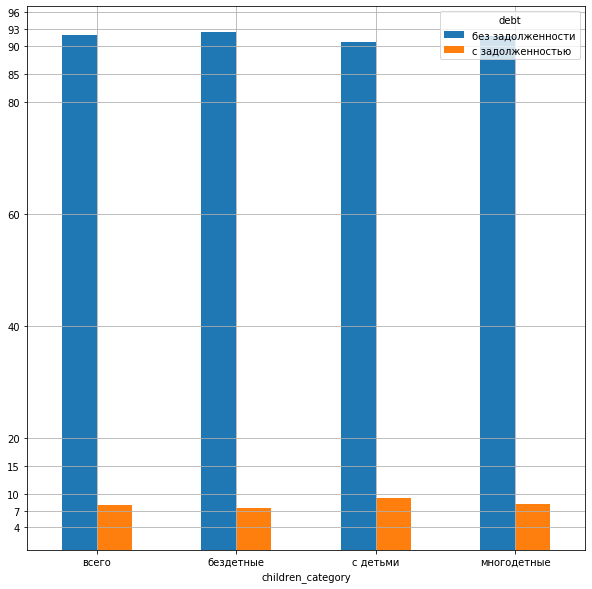

In [43]:
# использую метод .plot() чтобы наглядно представить сводную таблицу.
risk_by_children_pivot.plot(
    kind='bar',
    figsize=[10, 10],
    grid=True, rot=0,
    legend=True,
    yticks=[4, 7, 10, 15, 20, 40, 60, 80, 85, 90, 93, 96]
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно! Отлично, что ты используешь свободную таблицу и график
</div>

##### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [44]:
# создаю таблицу risk_by_family_status_pivot, соодержащую сводные данные по семейному положению в соотношении с наличием задолженности
# так как подчитываем количество строк где 'debt' равен 0 или 1 то используем любую колонку для аргумента values.
risk_by_family_status_pivot = research_data.pivot_table(
    index='family_status',
    columns='debt',
    values='education',
    margins=True, 
    margins_name='всего',
    aggfunc='count',
).sort_values(by=0, ascending=False)

# найду процент клиентов с задолженностью и без в каждой группе
risk_by_family_status_pivot.iloc[:, :2] = risk_by_family_status_pivot.iloc[:, :2].div(risk_by_family_status_pivot.iloc[:, -1], axis=0).mul(100)

# удалю колоку 'всего', не нужны после расчета процентов
risk_by_family_status_pivot.drop('всего', axis=1, inplace=True)

# переименую колонки задолженности для понятного предсатвления данных
risk_by_family_status_pivot = risk_by_family_status_pivot.rename(columns={0: 'без задолженности', 1: 'с задолженностью'})

# проверю
risk_by_family_status_pivot

debt,без задолженности,с задолженностью
family_status,,
всего,91.893535,8.106465
женат / замужем,92.449146,7.550854
гражданский брак,90.698236,9.301764
не женат / не замужем,90.253481,9.746519
в разводе,92.958927,7.041073
вдовец / вдова,93.403141,6.596859


##### Вывод 2:

По результатам сопоставления данных можно сделать вывод что семейное положение влияет на надежность клиента.  
Наиболее надежными категориями являются: 
- вдовцы/вдовы							(6.60%);
- разведенные							(7.04%);
- клиенты состоящие в официальном браке	(7,55%).  

Отклонение от минимального невозврата по группе превышает 2% для наименее надежных категорий.  

Наименее надежными категориями являются клиенты:
- находящиеся в гражданском браке	(9.30%);
- не состоящие в отношениях			(9.74%).  

Невозврат во всех группах не превышает 10%, как видно из приведенного графика.

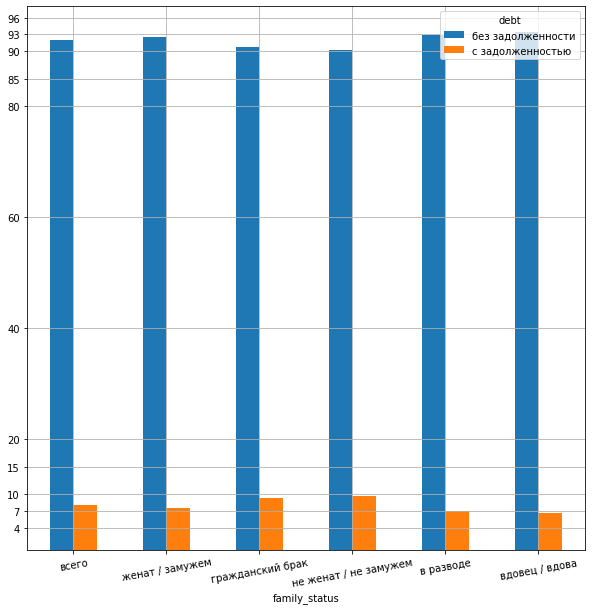

In [45]:
# использую метод .plot() чтобы наглядно представить сводную таблицу.
risk_by_family_status_pivot.plot(
    kind='bar',
    figsize=[10, 10],
    grid=True, rot=10,
    legend=True,
    yticks=[4, 7, 10, 15, 20, 40, 60, 80, 85, 90, 93, 96]
)

##### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [46]:
# создаю таблицу risk_by_total_income_pivot, соодержащую сводные данные по семейному положению в соотношении с наличием задолженности
# так как подcчитываем количество строк где 'debt' равен 0 или 1 то используем любую колонку для аргумента values.
risk_by_total_income_pivot = research_data.pivot_table(
    index='total_income_category',
    columns='debt',
    values='education',
    margins=True, 
    margins_name='всего',
    aggfunc='count',
).sort_values(by=0, ascending=False)

# найду процент клиентов с задолженностью и без в каждой группе
risk_by_total_income_pivot.iloc[:, :2] = risk_by_total_income_pivot.iloc[:, :2].div(risk_by_total_income_pivot.iloc[:, -1], axis=0).mul(100)

# удалю колоку 'всего', не нужны после расчета процентов
risk_by_total_income_pivot.drop('всего', axis=1, inplace=True)

# переименую колонки задолженности для понятного предсатвления данных
risk_by_total_income_pivot = risk_by_total_income_pivot.rename(columns={0: 'без задолженности', 1: 'с задолженностью'})

# проверю
risk_by_total_income_pivot

debt,без задолженности,с задолженностью
total_income_category,,
всего,91.893535,8.106465
C,91.436518,8.563482
B,93.043478,6.956522
D,94.000000,6.000000
A,92.000000,8.000000
E,90.909091,9.090909


##### Вывод 3:

Для группировки по уровню дохода исопльзуются следующие значения:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

По результатам сопоставления данных можно сделать вывод что уровень дохода влияет на надежность клиента.

Наиболее надежными категориями являются:
- D	(6.00%);
- B	(6.96%);
- A	(8.00%).

Отклонение от минимального невозврата по группе превышает 2% для наименее надежных категорий.  

Наименее надежными категориями являются: 
- C	(8.56%);
- E	(9.09%).

Невозврат во всех группах не превышает 10%, как видно из приведенного графика.

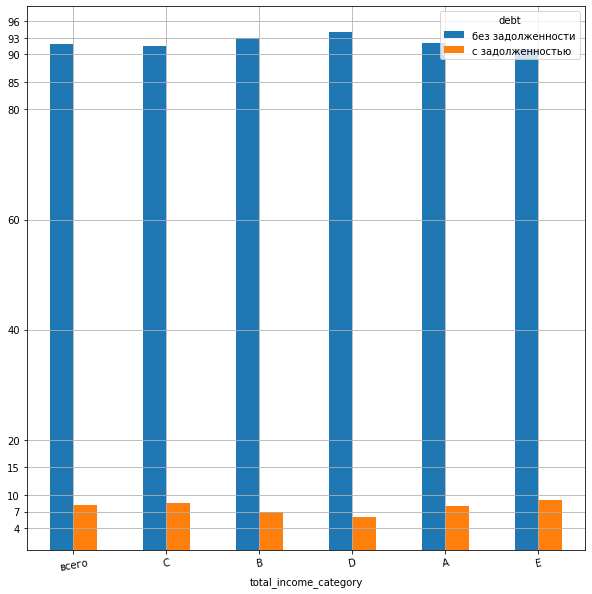

In [47]:
# использую метод .plot() чтобы наглядно представить сводную таблицу.
risk_by_total_income_pivot.plot(
    kind='bar',
    figsize=[10, 10],
    grid=True, rot=10,
    legend=True,
    yticks=[4, 7, 10, 15, 20, 40, 60, 80, 85, 90, 93, 96]
)

##### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?

In [48]:
# создаю таблицу risk_by_purpose_pivot, соодержащую сводные данные по семейному положению в соотношении с наличием задолженности
# так как подчитываем количество строк где 'debt' равен 0 или 1 то используем любую колонку для аргумента values.
risk_by_purpose_pivot = research_data.pivot_table(
    index='purpose_category',
    columns='debt',
    values='education',
    margins=True, 
    margins_name='всего',
    aggfunc='count',
).sort_values(by=0, ascending=False)

# найду процент клиентов с задолженностью и без в каждой группе
risk_by_purpose_pivot.iloc[:, :2] = risk_by_purpose_pivot.iloc[:, :2].div(risk_by_purpose_pivot.iloc[:, -1], axis=0).mul(100)

# удалю колоку 'всего', не нужны после расчета процентов
risk_by_purpose_pivot.drop('всего', axis=1, inplace=True)

# переименую колонки задолженности для понятного предсатвления данных
risk_by_purpose_pivot = risk_by_purpose_pivot.rename(columns={0: 'без задолженности', 1: 'с задолженностью'})

# проверю
risk_by_purpose_pivot

debt,без задолженности,с задолженностью
purpose_category,,
всего,91.893535,8.106465
операции с недвижимостью,92.761021,7.238979
операции с автомобилем,90.652681,9.347319
получение образования,90.770385,9.229615
проведение свадьбы,92.095032,7.904968


##### Вывод 4:

По результатам сопоставления данных можно сделать вывод что цель получения кредита влияет на надежность клиента.

Наиболее надежными категориями являются клиенты с целю:
- операции с недвижимостью	(7.24%);
- проведение свадьбы		(7.90%).

Отклонение от минимального невозврата по группе превышает 2% для наименее надежных категорий.  

Наименее надежными категориями являются клиенты с целю: 
- получение образования (9.23%);
- операции с автомобилем (9.35%).

Невозврат во всех группах не превышает 10%, как видно из приведенного графика.

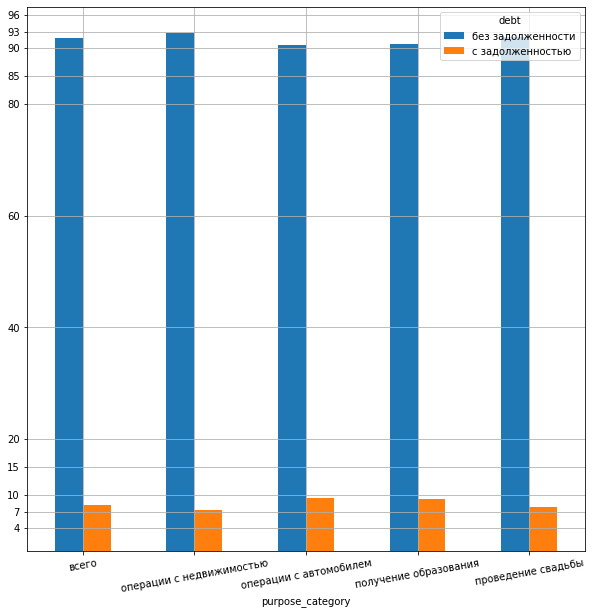

In [49]:
# использую метод .plot() чтобы наглядно представить сводную таблицу.
risk_by_purpose_pivot.plot(
    kind='bar',
    figsize=[10, 10],
    grid=True, rot=10,
    legend=True,
    yticks=[4, 7, 10, 15, 20, 40, 60, 80, 85, 90, 93, 96]
)

##### Вопрос 5:

Дополнительно ответим на вопрос влияет ли уровень образования на возврат кредита в срок.

In [50]:
# создаю таблицу risk_by_education_pivot, соодержащую сводные данные по семейному положению в соотношении с наличием задолженности
# так как подчитываем количество строк где 'debt' равен 0 или 1 то используем любую колонку для аргумента values.
risk_by_education_pivot = research_data.pivot_table(
    index='education',
    columns='debt',
    values='purpose_category',
    margins=True, 
    margins_name='всего',
    aggfunc='count',
    fill_value=0
).sort_values(by=0, ascending=False)

# найду процент клиентов с задолженностью и без в каждой группе
risk_by_education_pivot.iloc[:, :2] = risk_by_education_pivot.iloc[:, :2].div(risk_by_education_pivot.iloc[:, -1], axis=0).mul(100)

# удалю колоку 'всего', не нужны после расчета процентов
risk_by_education_pivot.drop('всего', axis=1, inplace=True)

# переименую колонки задолженности для понятного предсатвления данных
risk_by_education_pivot = risk_by_education_pivot.rename(columns={0: 'без задолженности', 1: 'с задолженностью'})

# проверю
risk_by_education_pivot

debt,без задолженности,с задолженностью
education,,
всего,91.893535,8.106465
среднее,91.026998,8.973002
высшее,94.690604,5.309396
неоконченное высшее,90.835580,9.164420
начальное,89.007092,10.992908
ученая степень,100.000000,0.000000


##### Вывод 5:

По результатам сопоставления данных можно сделать вывод что уровень образования влияет на надежность клиента.

Наиболее надежными категориями являются клиенты образованием:

- ученая степень (0.00%);
- высшее (5.30%).

Отклонение от минимального невозврата по группе превышает 2% для наименее надежных категорий.

Наименее надежными категориями являются клиенты с образованием:

- среднее (8.97%);
- неоконченное высшее (9.16%);
- начальное (10.99%).

Невозврат для категории клиентов с начальным образованием превышает 10%, как видно из приведенного графика.  
При это стоит заметить что количество клиентов с ученой степенью может быть недстаточными чтобы считать выборку репрезентативной.

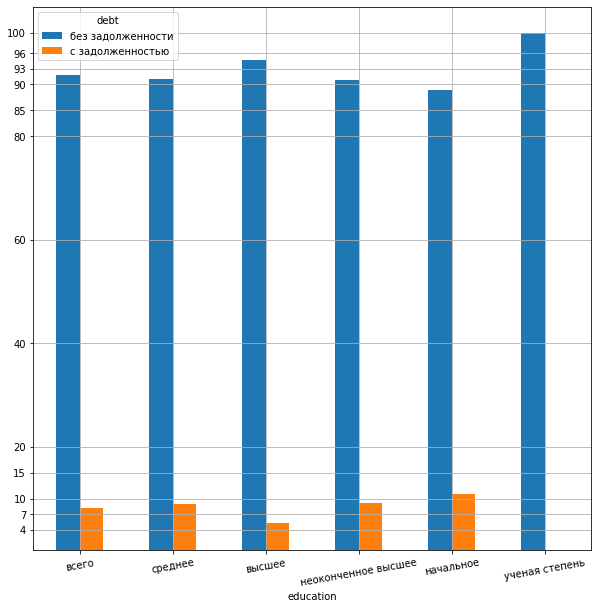

In [51]:
risk_by_education_pivot.plot(
    kind='bar',
    figsize=[10, 10],
    grid=True, rot=10,
    legend=True,
    yticks=[4, 7, 10, 15, 20, 40, 60, 80, 85, 90, 93, 96, 100]
)

## Общий вывод:

По итогам исследования можно сделать вывод что по по каждой из гипотез замечено отклонение в надежности клиента в зависимости от включенной группы. 

Наименьшее влияние замечено при группировке клиентов по количеству детей - отклонение от минимального процента невозврата не превысило 2%.  

По всем остальным методам группировки замечено отклонение от минимального процента невозврата на 2%, что говорит о возможности применения метода для оценки надежности клиентов.  
Для максимальной эффективности прогнозирования рекомедую использовать совокупность проверенных факторов.

При этом рекомендую обратить внимание на результаты дополнительной проверки надежности клиентов по уровню образования, так как эта првоерка показала наибольшее отклонение между надежными и ненадежными клиентами.